In [1]:
import matplotlib.pyplot as plt
import numpy as np


def rgb2gray(rgb):
    """
    Convert image from RGB into grayscale
    Input:  rgb = RGB image
    Output: grayscale image
    """
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [2]:
def partial_derivative(gray_image):
    """
    Find partial derivative using [-1 0 1] and [-1 0 1]T as x-derivative and y-derivate respectively.
    Input:  gray_image = grayscale image
    Output  Ix = x-derivative of image
            Iy = y-derivative of image
    """
    padded_gray_image = np.pad(gray_image, 1, mode='edge')
    Iy = padded_gray_image[2:, 1:-1] - padded_gray_image[:-2, 1:-1]
    Ix = padded_gray_image[1:-1, 2:] - padded_gray_image[1:-1, :-2]
    return Ix, Iy

In [3]:
def findCorners(image, window_size, k=0.04):
    """
    Compute the Harris Corner Detector score
    Input:  image = grayscale image
            window_size = the size (side length) of the sliding window (must be odd value)
            k = Harris corner constant. Usually 0.04 - 0.06
    Output: the Harris Corner Detector score of every pixel as the 2D numpy array
    :return:
    """
    # find second moment
    padded_size = window_size//2
    padded_image = np.pad(image, padded_size, 'edge')
    Ix, Iy = partial_derivative(padded_image)
    Ixx = Ix**2
    Ixy = Iy*Ix
    Iyy = Iy**2
    
    height, width = image.shape
    output = np.zeros(image.shape)
    #Loop through image and find our corners
    for i in range(height):
        for j in range(width):
            M = np.zeros([2, 2])
            for row in range(window_size):
                for col in range(window_size):
                    m = np.array([[Ixx[row+i][col+j], Ixy[row+i][col+j]],[Ixy[row+i][col+j], Iyy[row+i][col+j]]])
                    M+=m
            R = ((M[0][0]*M[1][1])-(M[0][1]*M[1][0]))-(k*((M[0][0]+M[1][1])**2))
            output[i][j] = R
    return output

In [4]:
def nms(output, window_size):
    """
    Perform non-maximum suppression to find the coordinates of the corners
    Input:  output = the Harris Corner Detector score of every pixel as the 2D numpy array
            window_size = the size (side length) of the sliding window (must be odd value)
    Output: coordinates of the corner points
    """    
    threshold = 0.01*output.max()
    height, width = output.shape
    corners = np.zeros(output.shape, dtype='bool')
    padded_size = window_size//2
    padded_output = np.pad(output, padded_size, 'edge')
    for y in range(height):
        for x in range(width):
            #Calculate sum of squares
            window = padded_output[y:y+window_size, x:x+window_size]
            
            if output[y,x] > threshold and output[y,x] == window.max():
                corners[y,x] = 1 # maxmimum value
                print(window, output[y,x])
    return np.where(corners)


[[ 4.89985829e+00  9.05927443e+00  1.19483695e+01  1.25803438e+01
   1.14938696e+01  9.92085087e+00  7.76908478e+00  4.73296175e+00
   1.74703008e+00  6.60591816e-03 -5.67622419e-01]
 [ 5.06444755e+00  9.26233853e+00  1.24799277e+01  1.39796599e+01
   1.35539150e+01  1.19632966e+01  9.37653283e+00  5.69977216e+00
   2.07303474e+00 -1.17470150e-01 -8.55014599e-01]
 [ 5.26837388e+00  9.48335720e+00  1.27062153e+01  1.44845216e+01
   1.49502922e+01  1.38916794e+01  1.10033867e+01  6.70722591e+00
   2.38187968e+00 -2.38259691e-01 -1.14763017e+00]
 [ 5.47675693e+00  9.66050684e+00  1.29240424e+01  1.47334999e+01
   1.57799180e+01  1.54809593e+01  1.26260686e+01  7.71217695e+00
   2.66143832e+00 -4.09630651e-01 -1.51789995e+00]
 [ 5.60511591e+00  9.80422749e+00  1.30996772e+01  1.49296758e+01
   1.61309594e+01  1.63098606e+01  1.38249672e+01  8.52669861e+00
   2.79317449e+00 -6.95875547e-01 -1.95933887e+00]
 [ 5.68752675e+00  9.86896897e+00  1.31430714e+01  1.49661315e+01
   1.61485746e+01  

  18.40919084 17.02900509 13.76049543 10.02008884  7.5089508 ]] 32.2812898719353
[[ 1.42941183  1.6954835   1.93092562  2.13954291  2.29181812  1.99725939
   0.89567466 -0.24954923 -0.51504749 -0.48397837 -0.52555718]
 [ 2.47495636  2.96415888  3.41087273  3.81000214  4.16339958  3.99818094
   2.53796313  0.54206925 -0.33053649 -0.42352047 -0.46212129]
 [ 3.53517425  4.24222013  4.90080782  5.49440419  6.05335708  6.07194121
   4.55444543  1.89574988  0.14743124 -0.3491663  -0.43166187]
 [ 4.61748343  5.53182793  6.41021335  7.21871494  7.9965825   8.20482976
   6.81120984  3.84746663  1.19484106 -0.01858127 -0.2932475 ]
 [ 5.54277897  6.62639018  7.70593203  8.70880959  9.68167933 10.01186387
   8.67847713  5.58805674  2.48653647  0.68969257  0.04615954]
 [ 6.39348573  7.68206442  8.91304955  9.98398366 10.87707088 10.99132109
   9.42651769  6.31992223  3.34843358  1.40629882  0.41153183]
 [ 7.13557275  8.48159587  9.38036814 10.02539205 10.38903571 10.12021453
   8.52047121  5.807771

   7.72939816e+00  5.76739736e+00  2.40064347e+00]] 12.51278795792661
[[-0.8014211  -0.56980404 -0.22531763  0.07220459  0.32244728  0.53953933
   0.71200453  0.58159763  0.25231887  0.06590772  0.03615676]
 [-0.75388655 -0.56053325 -0.11305734  0.53545152  1.33250774  2.10828088
   2.47692404  2.04221911  1.01293232  0.17819713 -0.0548445 ]
 [-0.24472841  0.55065074  1.75425274  3.27104023  4.63464697  5.47123333
   5.40591219  4.35394167  2.48627575  0.61132052 -0.16820056]
 [ 0.70452032  2.40125638  4.39324777  6.36722616  7.6995398   8.17324193
   7.61684821  6.12551909  3.75248915  1.10126948 -0.21242849]
 [ 1.31497601  3.22848638  5.28933485  7.33635364  8.70482902  9.0653487
   8.35690345  6.73550259  4.2313087   1.33484851 -0.19609066]
 [ 1.44638705  3.21467857  5.10151641  7.08227161  8.69336567  9.22550994
   8.49707306  6.84456578  4.32060011  1.38186498 -0.19268742]
 [ 1.28548556  2.86875778  4.55796174  6.39756643  8.2174202   9.15053079
   8.50530727  6.83729038  4.318522

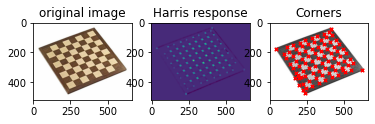

In [9]:
if __name__ == "__main__":
    img = plt.imread('chess_board.jpg')
    img = img / 255.

    window_size = 11
    k = 0.04
    
    gray_img = rgb2gray(img)
    output = findCorners(gray_img, window_size, k)

    corners_points = nms(output, window_size)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title('original image')
    plt.subplot(1,3,2)
    plt.imshow(output)
    plt.title('Harris response')
    plt.subplot(1,3,3)
    plt.imshow(gray_img, cmap='gray')
    plt.scatter(corners_points[1], corners_points[0], s=12, c='r', marker='x')
    plt.title('Corners')
    plt.show()